In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as np
import cv2
import pickle
from keras import optimizers
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


X_train = np.reshape(X_train, (len(X_train), 28,28, 1))    # adapt this if using 'channels_first' image data format
X_test = np.reshape(X_test, (len(X_test), 28,28, 1))       # adapt this if using 'channels_first' image data format



In [3]:
X_train_noisy = np.random.normal(loc=0.0, scale=1.0, size=(len(X_train),4,4,8))
X_test_noisy_1 = np.random.normal(loc=0.0, scale=1.0, size=(len(X_test),4,4,8))



In [4]:

input_img = Input(shape=(4,4,8))    # adapt this if using 'channels_first' image data format

x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(X_train_noisy, X_train, epochs=10, batch_size=128, shuffle=True,callbacks=[TensorBoard(log_dir='conv_autoencoder')], verbose=1)

Epoch 1/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.3363
Epoch 2/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2898
Epoch 3/10
60000/60000 [==============================] - 47s 778us/step - loss: 0.2864
Epoch 4/10
60000/60000 [==============================] - 47s 781us/step - loss: 0.2799
Epoch 5/10
60000/60000 [==============================] - 46s 771us/step - loss: 0.2756
Epoch 6/10
60000/60000 [==============================] - 47s 778us/step - loss: 0.2715
Epoch 7/10
60000/60000 [==============================] - 54s 901us/step - loss: 0.2696
Epoch 8/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2690
Epoch 9/10
60000/60000 [==============================] - 48s 793us/step - loss: 0.2685
Epoch 10/10
60000/60000 [==============================] - 47s 779us/step - loss: 0.2681


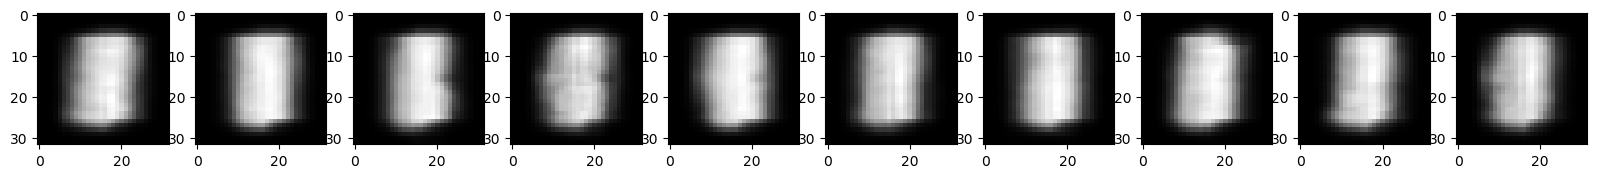

In [5]:
decoded_imgs = autoencoder.predict(X_test_noisy_1)
n = 10
plt.figure(figsize=(20, 14), dpi=100)
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(cv2.resize(decoded_imgs[i],(32,32)),cmap="gray")



plt.show()

# take a look at the 128-dimensional encoded representation
# these representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images
